<a href="https://colab.research.google.com/github/Guillermina86/Procesamiento-digital-de-imagenes/blob/main/TP4_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctico TP4 (Histograma de Luminancias)
Para este TP se desea que implementen lo siguiente:
Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.
Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.
Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.

### Importamos las librerías a utilizar

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io

In [3]:
# Función para ver una imagen
def get_image(rute):
  imagen = io.imread(rute)
  imagen = imagen.astype(np.int)
  return imagen

# Plotear Imagen
def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('off')
  plt.show()

# Función para pasar del espacio de color RGB a YIQ
def rgb2yiq(imagen):
    yiq = np.zeros(imagen.shape)  # creo una matriz con 0 del tamaño de la imagen de entrada
    yiq[:,:,0] = imagen[:,:,0] * 0.299 + imagen[:,:,1] * 0.587 + imagen[:,:,2] * 0.114
    yiq[:,:,1] = imagen[:,:,0] * 0.595716 + imagen[:,:,1] * -0.274453 + imagen[:,:,2] * -0.321263
    yiq[:,:,2] = imagen[:,:,0] * 0.211456 + imagen[:,:,1] * -0.522591 + imagen[:,:,2] * 0.311135
    return yiq

# Descomponer la imagen en sus compomentes YIQ
def imagen2yiq(yiq):
    y = yiq[:,:,0]
    i = yiq[:,:,1]
    q = yiq[:,:,2]
    return y, i, q

# Construir Imagen a partir de sus componentes YIQ
def yiq_to_image(y,i,q):
    Shape = y.shape
    im_out2 = np.zeros((Shape[0], Shape[1], 3))
    im_out2[:,:,0] = y
    im_out2[:,:,1] = i
    im_out2[:,:,2] = q
    return im_out2

# Función para pasar del espacio de color YIQ a RGB
def yiq2rgb(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:,:,0] = yiq[:,:,0] * 1 + yiq[:,:,1] * 0.9663 + yiq[:,:,2] * 0.6210
    rgb[:,:,1] = yiq[:,:,0] * 1 + yiq[:,:,1] * -0.2721 + yiq[:,:,2] * -0.6474
    rgb[:,:,2] = yiq[:,:,0] * 1 + yiq[:,:,1] * -1.1070 + yiq[:,:,2] * 1.7046

    rgb = np.clip(rgb, 0, 1)      # Matriz que contiene elementos para recortar, valor mínimo y máximo.
    return rgb

### Generamos la función a utilizar

In [4]:
def histograma (imagen, bins=10, canal=0):
  datos = imagen [:,:, canal]
  datos1 = datos.reshape(-1)
  histog = np.zeros(bins)
  for i in range (len(datos1)):
    valor = datos1[i]*bins
    valor = np.floor(valor).astype (int)
    if valor == bins:
        valor = bins-1 
    histog[valor] +=1
  return histog

### Imagen

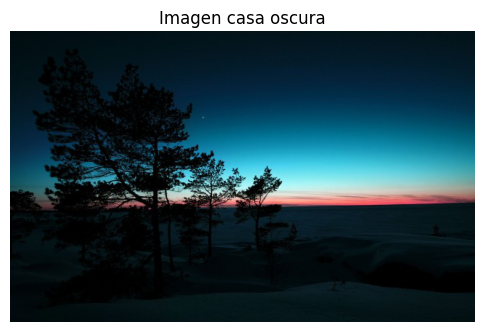

In [5]:
casa = 'https://swall.teahub.io/photos/small/245-2450965_fondos-de-pantalla-paisaje-oscuro.jpg'
imagen = get_image(casa)
plot_image(imagen, 'Imagen casa oscura')

In [6]:
im_yiq = rgb2yiq(imagen/255)
y, i, q = imagen2yiq(im_yiq)

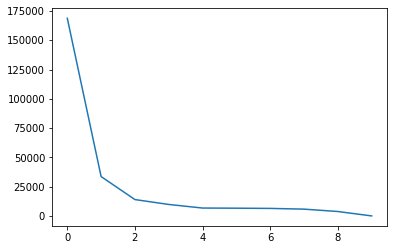

In [24]:
histog = histograma(im_yiq, 10, 0)
plt.figure()
plt.plot(histog)
plt.show()

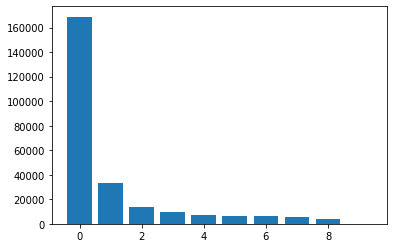

In [27]:
fig, ax = plt.subplots()
ax.bar([0,1,2,3,4,5,6,7,8,9],(histog))
plt.show()

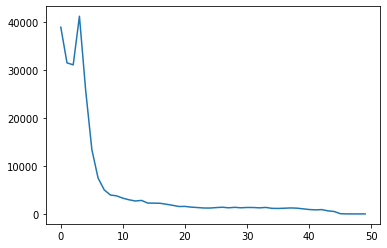

In [28]:
histog2 = histograma(im_yiq, 50, 0)
plt.figure()
plt.plot(histog2)
plt.show()

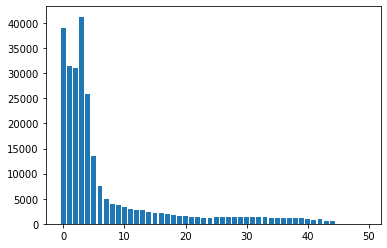

In [36]:
fig, ax = plt.subplots()
ax.bar((np.arange(0,50,1)),(histog2))
plt.show()

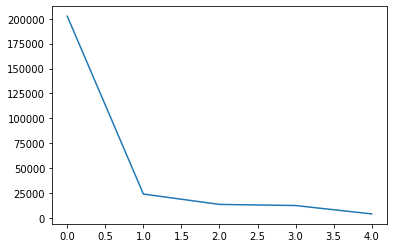

In [37]:
histog3 = histograma(im_yiq, 5, 0)
plt.figure()
plt.plot(histog3)
plt.show()

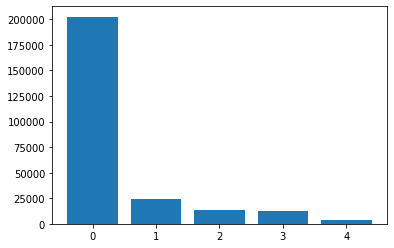

In [38]:
fig, ax = plt.subplots()
ax.bar((np.arange(0,5,1)),(histog3))
plt.show()

In [40]:
a = 0.7
y1 = y * a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


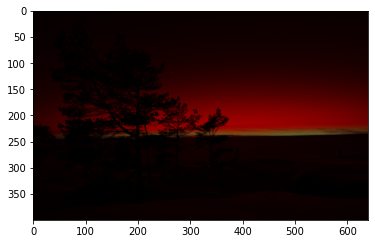

In [41]:
y1iq= yiq_to_image(y1, i, q)
plt.imshow(y1iq)

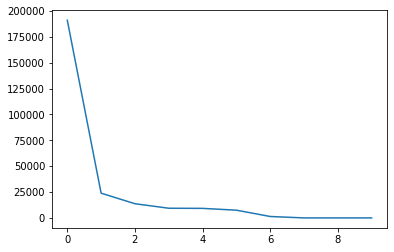

In [43]:
histog5 = histograma(y1iq, 10, 0)
plt.figure()
plt.plot(histog5)
plt.show()

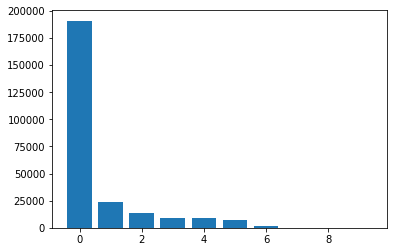

In [44]:
fig, ax = plt.subplots()
ax.bar((np.arange(0,10,1)),(histog5))
plt.show()

In [13]:
import matplotlib.pyplot as plt

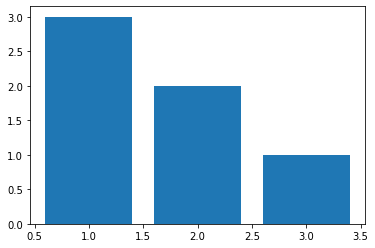

In [45]:
# bar(x, y): Dibuja un diagrama de barras verticales donde x es una lista con la posición de las barras en el eje X, 
# e y es una lista con la altura de las barras en el eje Y

fig, ax = plt.subplots()
ax.bar([1, 2, 3], [3, 2, 1])
plt.show()